___

<a href="https://lms.clarusway.com/mod/lesson/view.php?id=8514&pageid=8158&startlastseen=no"><img align="center" src="https://i.ibb.co/6Z5pQxD/lmss.png" alt="Open in Clarusway LMS" width="70" height="200" title="Open Clarusway Learning Management Sytem"></a>

<a href="https://github.com/clarusway/DS-DE-0322-Students/blob/main/3-%20Classes%26Labs/2-DAwPY/DAwPy_S05-06_(Groupby%20%26%20Useful%20Operations).ipynb"><img align="left" src="https://i.ibb.co/n3HWyQX/github-logo.png" alt="Open in Clarusway GitHub" width="100" height="150" title="Open and Execute in Clarusway GitHub Repository"></a>

<a href="https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/DAwPy_S5_6_%28Groupby_and_Useful_Operations%29/DAwPy_S5_6_%28Groupby_and_Useful_Operations%29.ipynb"><img align="right" src="https://i.ibb.co/48wtV8c/nbviewer-badge.png" alt="Open in nbviewer" width="130" height="200" title="Open and Execute in nbviewer"></a><br/>
___

<a href="https://clarusway.com/"><img align="center" src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" alt="CLRSWY" width="450" height="200" title="Welcome to Place Where You can Reinvent Yourself"></a><br/>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:120%; text-align:center; border-radius:10px 10px;">Way to Reinvent Yourself</p>

<p style="text-align: center;"><img src="https://i.ibb.co/99DQ3TY/DS-Courses.png" class="img-fluid" 
alt="CLRSWY"></p>


<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 05 & 06</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Groupby & Useful Operations</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [BASIC AGGREGATION METHODS](#1)
* [GROUPBY & AGGREGATION](#2)
    * [DataFrame.groupby()](#2.1)
* [DATAFRAME/SERIES OPERATIONS](#3)
    * [.aggregate()/agg()](#3.1)
        * [DataFrame.agg()](#3.1.1)
        * [DataFrame.groupby().agg()](#3.1.2)
    * [.filter()](#3.2)
        * [DataFrame.groupby().filter()](#3.2.1)
    * [.transform()](#3.3)
        * [DataFrame.groupby().transform()](#3.3.1)
    * [.apply()](#3.4)
        * [Series.apply() - df["col"].apply()](#3.4.1)
        * [DataFrame.apply()](#3.4.2)
    * [.applymap()](#3.5)
    * [.map()](#3.6)
        * [Series.map() - df["col"].map()](#3.6.1)
        * [DataFrame.map()](#3.6.2)
    * [df.transform() vs df.apply()](#3.7)
* [pivot() vs pivot_table()](#8)
* [.stack() & .unstack()](#9)
    * [.stack()](#9.1)
    * [.unstack()](#9.2)
* [THE END OF THE SESSION - 05 & 06](#10)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy you can import it as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  # to suppress all warnings

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Basic Aggregation Methods</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One of the most basic analysis functions is grouping and aggregating data. In some cases, this level of analysis may be sufficient to answer real-world/business questions. In other instances, this activity might be the first step in a more complex data science analysis. In pandas, the **``groupby()``** function can be combined with one or more aggregation functions to quickly and easily summarize data. This concept is deceptively simple and most new pandas users will smootly understand this concept. However, they might be surprised at how useful complex aggregation functions can be for supporting sophisticated analysis [Source](https://pbpython.com/groupby-agg.html).

An essential piece of analysis of large data is efficient summarization: computing aggregations, such as **``sum()``**, **``mean()``**, **``median()``**, **``min()``**, and **``max()``**, in which a single number gives insight into the nature of a potentially large dataset. The **``aggregate()``** method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis [Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html).

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays which are also used for Pandas Dataframes [Pandas Official Documentation](https://pandas.pydata.org/docs/reference/frame.html); we'll discuss and demonstrate some of them here:

* **``count()``** ==> Counts non-NA cells for each column or row.
* **``mean()``** ==> Returns the mean of the values over the requested axis.
* **``median()``** ==> Returns the median of the values over the requested axis.
* **``min()``** ==> Returns the minimum of the values over the requested axis.
* **``max()``** ==> Returns the maximum of the values over the requested axis.
* **``std()``** ==> Returns sample standard deviation over requested axis.
* **``var()``** ==> Returns unbiased variance over requested axis.
* **``sum()``** ==> Returns the sum of the values over the requested axis.
* **``idxmin()``** ==> Returns index of first occurrence of minimum over requested axis.
* **``idxmax()``** ==> Returns index of first occurrence of maximum over requested axis.
* **``corr()``** ==> Computes pairwise correlation of columns, excluding NA/null values.

To sum up, in this session, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

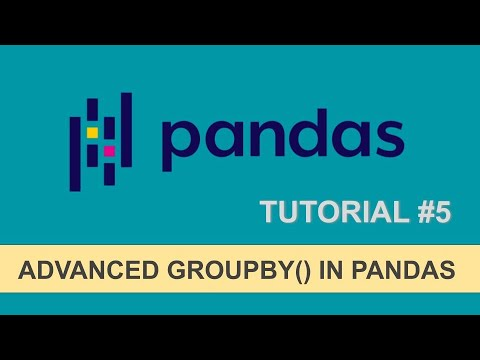

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('DUgd48QYmfI', width=800, height=500)

In [3]:
df = pd.DataFrame(np.random.randint(0, 100, size=(7, 5)), 
                  columns=["x1", "x2", "x3", "x4", "x5"])
df

,x1,x2,x3,x4,x5
0,98,58,14,42,82
1,42,58,18,67,19
2,0,42,82,77,45
3,6,14,70,21,89
4,7,75,37,56,18
5,77,50,57,87,94
6,97,78,92,37,36


**Let us remember first some aggregate methods we learned in the previous sessions:**

In [4]:
df.count()

x1    7
x2    7
x3    7
x4    7
x5    7
dtype: int64

In [5]:
df['x1'].count()

7

In [6]:
df.mean()

x1    46.714286
x2    53.571429
x3    52.857143
x4    55.285714
x5    54.714286
dtype: float64

In [7]:
df.x2.mean()

53.57142857142857

In [8]:
df.median()

x1    42.0
x2    58.0
x3    57.0
x4    56.0
x5    45.0
dtype: float64

In [9]:
df.x3.median()

57.0

In [10]:
df.min()

x1     0
x2    14
x3    14
x4    21
x5    18
dtype: int32

In [11]:
df.x4.min()

21

In [12]:
df.idxmin()

# df.argmin()
# # Raises an error of "AttributeError: 'DataFrame' object has no attribute 'argmin'""

x1    2
x2    3
x3    0
x4    3
x5    4
dtype: int64

In [13]:
df.x5.idxmin()

# df.x5.argmin()

4

Pandas **``dataframe.idxmin()``** method returns index of **first occurrence of minimum** over requested axis. While finding the index of the minimum value across any index, all NA/null values are excluded.

In [14]:
df.std()

x1    43.809110
x2    21.632207
x3    30.737754
x4    23.457154
x5    32.993506
dtype: float64

In [15]:
df[["x1", "x2"]].std()

x1    43.809110
x2    21.632207
dtype: float64

In [16]:
df.var()

x1    1919.238095
x2     467.952381
x3     944.809524
x4     550.238095
x5    1088.571429
dtype: float64

In [17]:
df[["x1", "x2"]].var()

x1    1919.238095
x2     467.952381
dtype: float64

In [18]:
df.sum(axis=0)

x1    327
x2    375
x3    370
x4    387
x5    383
dtype: int64

In [19]:
df.sum(axis=1)

0    294
1    204
2    246
3    200
4    193
5    365
6    340
dtype: int64

In [20]:
df.x1.sum()

327

In [21]:
df.describe()

,x1,x2,x3,x4,x5
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,46.714286,53.571429,52.857143,55.285714,54.714286
std,43.809110,21.632207,30.737754,23.457154,32.993506
min,0.000000,14.000000,14.000000,21.000000,18.000000
25%,6.500000,46.000000,27.500000,39.500000,27.500000
50%,42.000000,58.000000,57.000000,56.000000,45.000000
75%,87.000000,66.500000,76.000000,72.000000,85.500000
max,98.000000,78.000000,92.000000,87.000000,94.000000


In [22]:
# df.describe().transpose()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,7.0,46.714286,43.809110,0.0,6.5,42.0,87.0,98.0
x2,7.0,53.571429,21.632207,14.0,46.0,58.0,66.5,78.0
x3,7.0,52.857143,30.737754,14.0,27.5,57.0,76.0,92.0
x4,7.0,55.285714,23.457154,21.0,39.5,56.0,72.0,87.0
x5,7.0,54.714286,32.993506,18.0,27.5,45.0,85.5,94.0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Groupby & Aggregation</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In Exploratory Data Analysis (EDA), we often would like to analyze data by some categories. In SQL, the GROUP BY statement groups row that has the same category values into summary rows. In Pandas, SQL's GROUP BY operation is performed using the similarly named **``groupby()``** method. Pandas' groupby() allows us to split data into separate groups to perform computations for better analysis [Source](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5).

In this part of the session, you'll learn the "group by" process (split-apply-combine) and how to use Pandas's groupby() function to group data and perform operations.

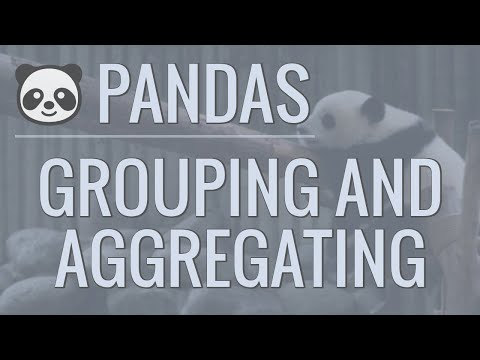

In [23]:
from IPython.display import YouTubeVideo

YouTubeVideo('txMdrV1Ut64', width=800, height=500)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby()</p>

<a id="2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Pandas' **``groupby()``** method groups DataFrame using a mapper or by a Series of columns. A groupby operation involves some combination of **splitting the object, applying a function, and combining the results**. This can be used to group large amounts of data and compute operations on these groups [Official Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In other words, the **``groupby()``** method allows you to group rows of data together and call aggregate functions.

The aggregate function stated in [Pandas documentation, Group by: split-apply-combine — pandas 1.1.2 documentation 1](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#applying-different-functions-to-dataframe-columns) does not needs the parenthesis.

**``DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)``**

In [24]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'GOOG', 'MSFT', 'GOOG', 'MSFT'],
        'Department':['HR', 'IT', 'IT', 'HR', 'HR', 'IT', 'IT', 'HR'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'Tom', 'Terry'],
        'Age':[30, 28, 35, 40, 42, 25, 32, 48],
        'Sales':[200, 120, 340, 124, 243, 350, 180, 220]}

In [25]:
df1 = pd.DataFrame(data)
df1

,Company,Department,Person,Age,Sales
0,GOOG,HR,Sam,30,200
1,GOOG,IT,Charlie,28,120
2,MSFT,IT,Amy,35,340
3,MSFT,HR,Vanessa,40,124
4,GOOG,HR,Carl,42,243
5,MSFT,IT,Sarah,25,350
6,GOOG,IT,Tom,32,180
7,MSFT,HR,Terry,48,220


In [26]:
df1.groupby('Company')

In [27]:
df1.groupby('Company').mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [28]:
df1.groupby('Company')["Sales"].mean()

Company
GOOG    185.75
MSFT    258.50
Name: Sales, dtype: float64

In [29]:
df1.groupby('Company')[["Sales"]].mean()

,Sales
Company,
GOOG,185.75
MSFT,258.50


In [30]:
df1.groupby(['Company', "Department"]).mean()

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

In [31]:
df1.groupby(['Company', "Department"])[["Sales"]].mean()

Sales
Company Department       
GOOG    HR          221.5
        IT          150.0
MSFT    HR          172.0
        IT          345.0

You do NOT have to apply all aggregate functions one by one rather you can use describe() method to see the results of many agg functions:

In [32]:
df1.groupby(['Company', "Department"])[["Sales"]].describe()

Sales                                                  \
                   count   mean        std    min     25%    50%     75%   
Company Department                                                         
GOOG    HR           2.0  221.5  30.405592  200.0  210.75  221.5  232.25   
        IT           2.0  150.0  42.426407  120.0  135.00  150.0  165.00   
MSFT    HR           2.0  172.0  67.882251  124.0  148.00  172.0  196.00   
        IT           2.0  345.0   7.071068  340.0  342.50  345.0  347.50   

                           
                      max  
Company Department         
GOOG    HR          243.0  
        IT          180.0  
MSFT    HR          220.0  
        IT          350.0

**Now you can use the ``.groupby()`` method to group rows together based on a column name. For instance, let's group based on Company. This will create a DataFrameGroupBy object:**

In [33]:
df1.groupby('Company')

You can save this object as a new variable:

In [34]:
by_comp = df1.groupby(["Company", "Department"])

And then call aggregate methods off the object:

In [35]:
by_comp.mean()

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

In [36]:
by_comp.Sales.describe()

count   mean        std    min     25%    50%     75%  \
Company Department                                                          
GOOG    HR            2.0  221.5  30.405592  200.0  210.75  221.5  232.25   
        IT            2.0  150.0  42.426407  120.0  135.00  150.0  165.00   
MSFT    HR            2.0  172.0  67.882251  124.0  148.00  172.0  196.00   
        IT            2.0  345.0   7.071068  340.0  342.50  345.0  347.50   

                      max  
Company Department         
GOOG    HR          243.0  
        IT          180.0  
MSFT    HR          220.0  
        IT          350.0

As seen by examplaes above, Pandas **DataFrame.groupby()** function divides data into groups based on specific criteria, applies an aggreagate function, and combines the results. Pandas objects created by groupby() can be divided into any number of groups along any axis. 

This is very useful for grouping large amounts of data, performing operations, and getting insights from the data. Pandas groupby default behavior converts the groupby columns into indexes and removes them from the DataFrame’s list of columns.

In our case, since the features of "Company" and "Department" were used for grouping, a Multiindex we covered in the previous session was created by groupby() method. Now let's check the index to confirm that it's hierarchical and review some basic attributes and methods we learned for this Multiindex:	

In [37]:
by_comp.mean().index

MultiIndex([('GOOG', 'HR'),
            ('GOOG', 'IT'),
            ('MSFT', 'HR'),
            ('MSFT', 'IT')],
           names=['Company', 'Department'])

We have now created a Multi-Index, or hierarchical index (become comfortable with both these terms as you'll find them used interchangeably), and you can see this by checking out the index as above. The above tells you that your DataFrame df now has a MultiIndex with two levels, the first given by the "Company, the second by the the "Department. We can check them by means of index.names attributes: 

In [38]:
by_comp.mean().index.names

FrozenList(['Company', 'Department'])

In [39]:
by_comp.mean().sort_index()

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

Recall from our previous sessions you are able to slice the DataFrame using the index and the .loc[ ] accessor. To be able to slice with a multi-index, you need to pass a tuple to the .loc[ ] accessor:

In [40]:
by_comp.mean()[["Age"]]

Age
Company Department      
GOOG    HR          36.0
        IT          30.0
MSFT    HR          44.0
        IT          30.0

In [41]:
by_comp.mean().loc[[("GOOG", "IT")]]

,,Age,Sales
Company,Department,,
GOOG,IT,30.0,150.0


In [42]:
by_comp.mean().loc[[("GOOG", "IT")], ["Age"]]

,,Age
Company,Department,
GOOG,IT,30.0


In [43]:
by_comp.mean().loc[("GOOG", "IT"):("MSFT", "HR")]

,,Age,Sales
Company,Department,,
GOOG,IT,30.0,150.0
MSFT,HR,44.0,172.0


Moreover, you can do a bunch of useful things with this grouping data, such as swaping the levels of the hierarchical index :

In [44]:
by_comp.mean().swaplevel()

,,Age,Sales
Department,Company,,
HR,GOOG,36.0,221.5
IT,GOOG,30.0,150.0
HR,MSFT,44.0,172.0
IT,MSFT,30.0,345.0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Useful Operations</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- ### `.aggregate()`
- ### `.filter()`
- ### `.transform()`
- ### `.apply()`
- ### `.applymap()`
- ### `.map()`
- ### `.pivot() & .pivot_table()`
- ### `.stack() & .unstack()`

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">.aggregate() / agg()</p>

<a id="3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.agg()</p>

<a id="3.1.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.aggregate(func=None, axis=0, *args, **kwargs)``**

Returns: scalar, Series or DataFrame

The return can be:
- scalar : when Series.agg is called with single function
- Series : when DataFrame.agg is called with a single function
- DataFrame : when DataFrame.agg is called with several functions (Returns scalar, Series or DataFrame).

The aggregation operations are always performed over an axis, either the index (default) or the column axis. This behavior is different from numpy aggregation functions (mean, median, prod, sum, std, var), where the default is to compute the aggregation of the flattened array, e.g., numpy.mean(arr_2d) as opposed to numpy.mean(arr_2d, axis=0).

**agg()** is an **alias for aggregate()**. Use the alias [Official Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html).

In [45]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [46]:
# The return became a scalar value since Series.agg is called with single function

df2.var1.agg(min)

10

In [47]:
# The return became a Series since DataFrame.agg is called with a single function

df2.agg(min)

groups      A
var1       10
var2      100
dtype: object

In [48]:
# The return became a DataFrame since DataFrame.agg is called with several functions (Returns scalar, Series or DataFrame).

df2.agg([sum, min])

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [49]:
df2[["var1", "var2"]].agg([sum, min])

,var1,var2
sum,403,3771
min,10,100


In [50]:
df2.agg({"var1":sum, "var2":min})

var1    403
var2    100
dtype: int64

In [51]:
df2.agg({"var1":[sum], "var2":[min]})

,var1,var2
sum,403.0,NaN
min,NaN,100.0


In [52]:
df2.agg({"var1":[sum, np.mean], "var2":[min, max]})

,var1,var2
sum,403.000000,NaN
mean,44.777778,NaN
min,NaN,100.0
max,NaN,969.0


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().agg()</p>

<a id="3.1.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.agg(arg, *args, **kwargs)``**

Aggregates using one or more operations over the specified axis [Pandas Official Documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

[SOUREC01](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)

In [53]:
df2.groupby('groups').aggregate([np.min, np.median, np.max])

var1             var2            
       amin median amax amin median amax
groups                                  
A        10   22.0   76  100  262.0  405
B        11   23.0   84  111  253.0  578
C        33   45.0   99  333  760.0  969

In [54]:
df2.groupby('groups').agg([np.min, "median", max])

var1            var2            
       amin median max amin median  max
groups                                 
A        10   22.0  76  100  262.0  405
B        11   23.0  84  111  253.0  578
C        33   45.0  99  333  760.0  969

In [55]:
df2.groupby('groups').agg({'var1':(min, 'max'), 'var2':'median'})

var1       var2
        min max median
groups                
A        10  76  262.0
B        11  84  253.0
C        33  99  760.0

In [56]:
df2.groupby('groups')["var1"].agg([min, 'max'])

,min,max
groups,,
A,10,76
B,11,84
C,33,99


In [57]:
df2.groupby('groups')[["var1","var2"]].agg([min, 'max'])

var1     var2     
        min max  min  max
groups                   
A        10  76  100  405
B        11  84  111  578
C        33  99  333  969

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.filter()</p>

<a id="3.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Pandas **``Dataframe.filter()``** is an inbuilt function that is used to subset columns or rows of DataFrame according to labels in the particular index. The DataFrame **``filter()``** returns subset the DataFrame rows or columns according to the detailed index labels. **One thing to note that** this routine does **NOT** filter a DataFrame on its contents. The filter() function is applied to the labels of the index [Pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html)

[SOUREC01](https://www.sharpsightlabs.com/blog/pandas-filter/) & [SOURCE02](https://appdividend.com/2020/03/19/pandas-filter-pandas-dataframe-filter-in-python-example/)

In [58]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [59]:
df2.filter(["groups", "var1"])

#df2[["groups", "var1"]]

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [60]:
df2.filter(regex="^var", axis=1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [61]:
# The "like" parameter enables you to identify items that contain a certain string.

df2.filter(like="var", axis=1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [62]:
df2.filter(like="1", axis=0)

,groups,var1,var2
1,B,23,253


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.filter(func, dropna=True, *args, **kwargs)``**
- Returns a copy of a DataFrame excluding filtered elements.
- Elements from groups are filtered if they do not satisfy the boolean criterion specified by func [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html).

In [63]:
df2.groups.unique()

array(['A', 'B', 'C'], dtype=object)

**Example-1**

In [64]:
df2.groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [65]:
def filter_func(x):
    return x["var1"].mean() > 39

In [66]:
# returns the rows that meet the condition, as a DataFrame

df2.groupby('groups').filter(filter_func)

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


**Example-2**

In [67]:
df2.groupby("groups").sum()

,var1,var2
groups,,
A,108,767
B,118,942
C,177,2062


In [68]:
df2.groupby('groups').filter(lambda x : x['var2'].sum() < 800)

,groups,var1,var2
0,A,10,100
3,A,22,262
6,A,76,405


In [69]:
# df2.groupby("groups")[["var2"]].sum()
# lambda x : x["var2"].sum() > 800
# print(*df2.groupby("groups"),  sep="\n")
# (lambda x : x["var2"].sum() > 800)(df2.groupby("groups"))
# df2.groupby("groups").filter(lambda x : x["var2"].sum() > 800)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.transform()</p>

<a id="3.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.transform()</p>

<a id="3.3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.transform(func, axis=0, *args, **kwargs)``**

- Returns DataFrame
- Call func on self producing a DataFrame that must have the same length as self.

Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe. **``transform()``** is an operation mostly used in conjunction with groupby (which is one of the most useful operations in pandas). It is a powerful function that you can lean on for **feature engineering** in Python. As the name (feature engineering) suggests, it enables us to extract new features from existing ones. Let’s understand the importance of the transform function with the help of an example. 

[SOUREC01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/)

In [70]:
df_num = df2.iloc[:, 1:3]
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [71]:
df_num.transform(lambda x : x+10)

# df_num + 10

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [72]:
# returns A DataFrame that must have the same length as self. Standardization(mean 0 std 1) Normalization (0-1)
# z-score is is z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation.

df_num.transform(lambda x : (x-x.mean()) / x.std())

#(df_num-df_num.mean())/df_num.std()

# This is the dataframe we get after applying Transform function:

,var1,var2
0,-1.040605,-1.078044
1,-0.651625,-0.560989
2,-0.352409,-0.290633
3,-0.681547,-0.530573
4,-1.010684,-1.040870
5,1.622413,1.858697
6,0.934218,-0.047312
7,1.173590,0.537332
8,0.006649,1.152392


In [73]:
df_num.var1.transform(lambda x : (x-x.mean())/x.std())

0   -1.040605
1   -0.651625
2   -0.352409
3   -0.681547
4   -1.010684
5    1.622413
6    0.934218
7    1.173590
8    0.006649
Name: var1, dtype: float64

In [74]:
df_num.var1.transform(np.sqrt)

# np.sqrt(df_num.var1)
# df_num.var1.agg(np.sqrt)

0    3.162278
1    4.795832
2    5.744563
3    4.690416
4    3.316625
5    9.949874
6    8.717798
7    9.165151
8    6.708204
Name: var1, dtype: float64

In [75]:
df_num.var1.transform([np.sqrt, np.exp])

# df_num.var1.agg([np.sqrt, np.exp])

,sqrt,exp
0,3.162278,2.202647e+04
1,4.795832,9.744803e+09
2,5.744563,2.146436e+14
3,4.690416,3.584913e+09
4,3.316625,5.987414e+04
5,9.949874,9.889030e+42
6,8.717798,1.014800e+33
7,9.165151,3.025077e+36
8,6.708204,3.493427e+19


As seen above, transform comes in handy during feature extraction. As the name suggests, it enables us to extract new features from existing ones.

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().transform()</p>

<a id="3.3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.transform(func, *args, engine=None, engine_kwargs=None, **kwargs)``**
- Call function producing a like-indexed DataFrame on each group and return a DataFrame having the same indexes as the original object filled with the transformed values. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html).

In [76]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [77]:
df2.groupby("groups")["var1"].mean()

groups
A    36.000000
B    39.333333
C    59.000000
Name: var1, dtype: float64

In [78]:
df2.groupby("groups")["var1"].transform("mean")

0    36.000000
1    39.333333
2    59.000000
3    36.000000
4    39.333333
5    59.000000
6    36.000000
7    39.333333
8    59.000000
Name: var1, dtype: float64

In [79]:
df2["var1_mean_transform"] = df2.groupby("groups")["var1"].transform("mean")
df2

,groups,var1,var2,var1_mean_transform
0,A,10,100,36.000000
1,B,23,253,39.333333
2,C,33,333,59.000000
3,A,22,262,36.000000
4,B,11,111,39.333333
5,C,99,969,59.000000
6,A,76,405,36.000000
7,B,84,578,39.333333
8,C,45,760,59.000000


In [80]:
df2["var2_median_transform"] = df2.groupby("groups")["var2"].transform("median")
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262.0
1,B,23,253,39.333333,253.0
2,C,33,333,59.000000,760.0
3,A,22,262,36.000000,262.0
4,B,11,111,39.333333,253.0
5,C,99,969,59.000000,760.0
6,A,76,405,36.000000,262.0
7,B,84,578,39.333333,253.0
8,C,45,760,59.000000,760.0


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.apply()</p>

<a id="3.4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One alternative to using a loop to iterate over a DataFrame is to use the pandas **``.apply()``** method. This function acts as a **``map()``** function in Python. It takes a function as an input and applies this function to an entire DataFrame. **apply()** is used to apply a function along an axis of the DataFrame or on values of Series. In other words, ``Pandas.apply()``** allow the users to pass a function and apply it on **every single value** of the Pandas series. This function does **NOT** make changes to the original DataFrame object.

[SOUREC01](https://www.geeksforgeeks.org/python-pandas-apply/), [SOURCE02](https://www.datacamp.com/community/tutorials/pandas-apply) & [SOURCE03](https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Series.apply() - df["col"].apply()</p>

<a id="3.4.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Series.apply(func, convert_dtype=True, args=(), **kwargs)``**
- Invoke function on values of Series.
- Can be ufunc (a NumPy function that applies to the entire Series) or a Python function that only works on single values.. [Official Pandas Document](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.Series.apply.html).

In [81]:
df3 = pd.DataFrame({'col1':[1, 2, 3, 4],
                    'col2':[444, 555, 666, 444],
                    'col3':['abc', 'def', 'ghi', 'xyz']})
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [82]:
def squared(x):
    return x**2

In [83]:
df3['col1'].apply(squared)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [84]:
df3['col2'].apply(np.log)

0    6.095825
1    6.318968
2    6.501290
3    6.095825
Name: col2, dtype: float64

In [85]:
df3['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [86]:
df3['col3'].apply(lambda x: x[0] * 3)

0    aaa
1    ddd
2    ggg
3    xxx
Name: col3, dtype: object

In [87]:
df3['col2'].apply(lambda x: "high" if x > 500 else "low")

0     low
1    high
2    high
3     low
Name: col2, dtype: object

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.apply()</p>

<a id="3.4.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)``**
- Returns Series or DataFrame
- Result of applying function along the given axis of the DataFrame. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).

In [88]:
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262.0
1,B,23,253,39.333333,253.0
2,C,33,333,59.000000,760.0
3,A,22,262,36.000000,262.0
4,B,11,111,39.333333,253.0
5,C,99,969,59.000000,760.0
6,A,76,405,36.000000,262.0
7,B,84,578,39.333333,253.0
8,C,45,760,59.000000,760.0


In [89]:
df2.drop(["var1_mean_transform", "var2_median_transform"], axis=1, inplace=True)
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [90]:
# sum() functions works with putting + sign between each element of an iterable object

df2.apply(np.sum)

groups    ABCABCABC
var1            403
var2           3771
dtype: object

In [91]:
# It gives an error due to the non-numeric column : "groups"

# df2.apply(np.sum, axis=1)

In [92]:
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [93]:
df_num.apply(np.sum)

#df_num.sum()

var1     403
var2    3771
dtype: int64

In [94]:
df_num.apply(np.sum, axis=1)

#df_num.sum(axis=1)

0     110
1     276
2     366
3     284
4     122
5    1068
6     481
7     662
8     805
dtype: int64

In [95]:
df_num.apply(lambda x : x + 10)

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [96]:
df2.groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [97]:
df2.groupby('groups').apply(np.mean)

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DataFrame.applymap()</p>

<a id="3.5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.applymap(func, na_action=None, **kwargs)``**
- Apply a function to a Dataframe elementwise.
- This method applies a function that accepts and returns a scalar to every element of a DataFrame. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html).

In [98]:
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [99]:
df_num.applymap(lambda x: x*5)

#df_num.apply(lambda x: x*5)
#df_num*5

,var1,var2
0,50,500
1,115,1265
2,165,1665
3,110,1310
4,55,555
5,495,4845
6,380,2025
7,420,2890
8,225,3800


In [100]:
df_num.applymap(lambda x: len(str(x)))

,var1,var2
0,2,3
1,2,3
2,2,3
3,2,3
4,2,3
5,2,3
6,2,3
7,2,3
8,2,3


In [101]:
df_num.apply(lambda x: len(str(x)))

var1     96
var2    105
dtype: int64

In [102]:
# df_num.var1
# len(df_num.var1)
# str(df_num.var1)
# len(str(df_num.var1))

In [103]:
# for i in range(len(str(df_num.var1))):
#     print(f"Eleman {i} : ", str(df_num.var1)[i])

## Then what is the difference between applymap() & apply() ?

- **applymap()** is only available in DataFrame and used for element-wise operation across the whole DataFrame. It has been optimized and some cases work **much faster than apply()**

- **applymap()** method only works on a pandas dataframe where function is applied on every element individually. **apply()** method can be applied both to series and dataframes where **function can be applied both series and individual elements based on the type of function provided**.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Series.map()</p>

<a id="3.6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Series.map(arg, na_action=None)``**
- Map values of Series according to an input mapping or function.
- Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

***************************************************************************************************************************

- Python's **map()** is a built-in function that allows you to process and transform all the items in an iterable without using an explicit for loop, a technique commonly known as mapping.
- **map()** is useful when you need to apply a transformation function to each item in an iterable and transform them into a new iterable [Source](https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.).

- The **map()** function is used to map values of Series according to input correspondence. Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.
- **map()** accepts a dict or a Series. Values that are not found in the dict are converted to NaN, unless the dict has a default value [Source](https://www.w3resource.com/pandas/series/series-map.php).

In [104]:
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [105]:
df3.col1.map({1:"A", 2:"B"})

0      A
1      B
2    NaN
3    NaN
Name: col1, dtype: object

In [106]:
s = pd.Series(['Data Analyst', 'Data Scientist', np.nan, 'DevOps Engineer'])
s

0       Data Analyst
1     Data Scientist
2                NaN
3    DevOps Engineer
dtype: object

In [107]:
s.map('I am a {}'.format)

0       I am a Data Analyst
1     I am a Data Scientist
2                I am a nan
3    I am a DevOps Engineer
dtype: object

In [108]:
s.map('I am a {}'.format, na_action='ignore')

0       I am a Data Analyst
1     I am a Data Scientist
2                       NaN
3    I am a DevOps Engineer
dtype: object

**apply()** is used to apply a function along an axis of the DataFrame or on values of Series.<br> 
**applymap()** is used to apply a function to a DataFrame elementwise.<br> 
**map()** is used to substitute each value in a Series with another value.

[SOURCE01](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.), [SOURCE](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.transform() vs .apply()</p>

<a id="3.7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### Similarties
- Both apply() and transform() can be used to manipulate the entire DataFrame.
- Both apply() and transform() support lambda expression.
- Both apply() and transform() can be used for manipulating a single column.

In [109]:
df5 = pd.DataFrame({'A': [1, 2, 3], 'B': [10, 20, 30] })
df5

,A,B
0,1,10
1,2,20
2,3,30


In [110]:
df5.apply(lambda x: x+10)

# df5.transform(lambda x: x+10)

,A,B
0,11,20
1,12,30
2,13,40


In [111]:
df5['B_ap'] = df5['B'].apply(lambda x: x+10)
df5['B_tr'] = df5['B'].transform(lambda x: x+10)
df5

,A,B,B_ap,B_tr
0,1,10,20,20
1,2,20,30,30
2,3,30,40,40


### Differences between .apply() and .transform() when manupulating data
- **transform()** cannot produce aggregated results.
- **apply()** works with multiple Series at a time. But, **transform()** is only allowed to work with a single Series at a time.

In [112]:
df5 = df5[["A", "B"]]
df5

,A,B
0,1,10
1,2,20
2,3,30


In [113]:
# (1) transform() cannot produce aggregated results.

df5.apply(lambda x: x.sum())

# df5.transform(lambda x:x.sum()) # gives an error

A     6
B    60
dtype: int64

In [114]:
# (2) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time

df5.apply(lambda x: x["B"]-x["A"], axis=1)

# df5.transform(lambda x: x["B"]-x["A"], axis=1) # gives an error

0     9
1    18
2    27
dtype: int64

### Differences Between .apply() and .transform() when using them in conjunction with groupby()
- **transform()** returns a DataFrame that has the same length as the input, but **apply()** cannot
- **apply()** works with multiple Series at a time. But, **transform()** is only allowed to work with a single Series at a time.

In [115]:
df6 = pd.DataFrame({'key': ['a', 'b', 'c'] * 3,
                    'A': np.arange(9),
                    'B': [1, 2, 3] * 3})
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [116]:
df6.groupby('key')['A'].sum()

key
a     9
b    12
c    15
Name: A, dtype: int32

In [117]:
df6.groupby('key')['A'].apply(lambda x: x.sum())

key
a     9
b    12
c    15
Name: A, dtype: int64

In [118]:
df6.groupby('key')['A'].transform(lambda x: x.sum())

0     9
1    12
2    15
3     9
4    12
5    15
6     9
7    12
8    15
Name: A, dtype: int64

In [119]:
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [120]:
# (3) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

df6.groupby('key').apply(lambda x: (x["B"]-x["A"]).mean())

# df6.groupby('key').transform(lambda x: (x["B"]-x["A"]).mean()) # gives an error

key
a   -2.0
b   -2.0
c   -2.0
dtype: float64

**🔥 BE CAREFUL while creating a new feature using groupby() and apply() methods together 🔥**

In [121]:
df2["mean"] = df2.groupby("groups")["var1"].apply(np.mean)
df2

,groups,var1,var2,mean
0,A,10,100,NaN
1,B,23,253,NaN
2,C,33,333,NaN
3,A,22,262,NaN
4,B,11,111,NaN
5,C,99,969,NaN
6,A,76,405,NaN
7,B,84,578,NaN
8,C,45,760,NaN


In [122]:
df2.drop("mean", axis=1, inplace=True)
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">pivot() vs pivot_table()</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**pivot_table()**

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True).
- Creates a spreadsheet-style pivot table as a DataFrame.
- The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

**pivot()**

DataFrame.pivot(index=None, columns=None, values=None).
- Returns reshaped DataFrame organized by given index / column values.
- Reshapes data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame.
- This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

**Differences**
- **Pivot_table** is a generalization of pivot that **CAN** handle **duplicate values** for one pivoted index/column pair. However, **pivot()** is used for pivoting **without aggregation**. Therefore, it **CANNOT** deal with duplicate values for one index/column pair.
- **Pivot_table** will only allow numeric types as "values=", whereas **pivot** will take string types as "values=".
- **Pivot_table** also supports using multiple columns for the index.<br> 
[SOURCE](https://www.quora.com/In-pandas-whats-the-difference-between-dataframe-pivot-and-dataframe-pivot_table)

In [123]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional", "professional", "professional", "amateur", "amateur", "amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}

df7 = pd.DataFrame(data)

df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [124]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age'],
                aggfunc='mean')

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

**Let's see an example for same result**

In [125]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age', 'height', 'weight'],
                aggfunc='mean')

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [126]:
df7.pivot(index='gender',
          columns='sport',
          values=['age', 'height', 'weight'])

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

**Let's see a difference in terms of aggregate function**

**1. If we have categoric values for value parameter, we can use just "pivot" method.**

In [127]:
df7.pivot(index='gender',
          columns='sport',
          values='status')

sport,basketball,football,tennis,voleyball
gender,,,,
female,professional,NaN,professional,amateur
male,amateur,amateur,professional,NaN


In [128]:
# gives an error because no numeric types to aggregate

# df7.pivot_table(index='gender',
#                columns='sport',
#                values='status')

**2. If we have duplicate values in the column selected for index parameter, we can use only "pivot_table" method.**

In [129]:
# We want to color cell at <3, 2>. Coloring the background red, and text color Violet

# Custom function to color the desired cell
def styling_specific_cell(x, row_idx, col_idx):
    color = 'background-color: yellow; color: red'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler

In [130]:
# Let us remember our DataFrame first:

df7

idx_r = [2, 1]   # Row indexes of cells to be colored
idx_c = 1   # Column index of cell to be colored 

# Pass the row and column index as kwargs
df7.style.apply(styling_specific_cell, row_idx=idx_r, col_idx=idx_c, axis = None)  
# Axis set to None to work on entire dataframe

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


**Let's change the value "basketball" of observation for "sport" at the index number 2 into "tennis" to create duplicate values in the DataFrame.**

In [131]:
df7.loc[2, "sport"] = "tennis"
df7

idx_r = 2   # Row index of cell to color
idx_c = 1   # Column index of cell to color 

# Pass the row and column index as kwargs
df7.style.apply(styling_specific_cell, row_idx=idx_r, col_idx=idx_c, axis = None)  
# Axis set to None to work on entire dataframe

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [132]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='mean')

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [133]:
# gives an error because of the dublicate values

# df7.pivot(index='gender',
#          columns='sport',
#          values=['age','height','weight'])

In [134]:
# if we want to get a result with pivot method, we have to remove index parameter

df7.pivot(columns='sport',
          values=['age','height','weight'])

age                               height                  \
sport basketball football tennis voleyball basketball football tennis   
0            NaN      NaN   20.0       NaN        NaN      NaN  185.0   
1            NaN      NaN   24.0       NaN        NaN      NaN  172.0   
2            NaN      NaN   26.0       NaN        NaN      NaN  175.0   
3            NaN     23.0    NaN       NaN        NaN    178.0    NaN   
4            NaN      NaN    NaN      22.0        NaN      NaN    NaN   
5           21.0      NaN    NaN       NaN      196.0      NaN    NaN   

                    weight                            
sport voleyball basketball football tennis voleyball  
0           NaN        NaN      NaN   83.0       NaN  
1           NaN        NaN      NaN   58.0       NaN  
2           NaN        NaN      NaN   62.0       NaN  
3           NaN        NaN     80.0    NaN       NaN  
4         182.0        NaN      NaN    NaN      65.0  
5           NaN       90.0      NaN    NaN       NaN

**We can get the same results as both groupby() and pivot_table() do.**

In [135]:
df7.groupby(["gender","sport"]).mean()

age  height  weight
gender sport                           
female tennis      25.0   173.5    60.0
       voleyball   22.0   182.0    65.0
male   basketball  21.0   196.0    90.0
       football    23.0   178.0    80.0
       tennis      20.0   185.0    83.0

In [136]:
df7.pivot_table(index=['gender', 'sport'],
#                 columns = "status",
                values=['age','height','weight'],
                aggfunc='mean')

age  height  weight
gender sport                          
female tennis       25   173.5      60
       voleyball    22   182.0      65
male   basketball   21   196.0      90
       football     23   178.0      80
       tennis       20   185.0      83

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.stack() & .unstack()</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Reshape using **``stack()``** and **``unstack()``** function in Pandas python: Reshaping the data using **``stack()``** function in pandas converts the data into stacked format .i.e. the column is stacked row wise. When more than one column header is present we can stack the specific column header by specified the level. **``unstack()``** function in pandas converts the data into unstacked format [Source](https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/).

**Why and when should use a stack() and unstack() methods?**

[ANSWER](https://stackoverflow.com/questions/69139030/why-and-when-should-use-a-stack-and-unstack-methods)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">.stack()</p>

<a id="9.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.stack(level=- 1, dropna=True)``**
- Stacks the prescribed level(s) from columns to index.
- Returns a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame.
- The new inner-most levels are created by pivoting the columns of the current dataframe:
    - if the columns have a single level, the output is a Series;
    - if the columns have multiple levels, the new index level(s) is (are) taken from the prescribed level(s) and the output is a DataFrame.

In [137]:
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [138]:
df7["level"] = df7["weight"].transform(lambda x: "high" if x > 80 else "low")
df7

,gender,sport,status,age,height,weight,level
0,male,tennis,professional,20,185,83,high
1,female,tennis,professional,24,172,58,low
2,female,tennis,professional,26,175,62,low
3,male,football,amateur,23,178,80,low
4,female,voleyball,amateur,22,182,65,low
5,male,basketball,amateur,21,196,90,high


In [139]:
df8 = df7.pivot_table(index=['gender','sport'],
                      columns=["status","level"], 
                      values=['age','height','weight'],
                      aggfunc='mean'
                     )
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN          NaN  25.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball    21.0   NaN          NaN   NaN   196.0    NaN   
       football       NaN  23.0          NaN   NaN     NaN  178.0   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis              NaN  173.5     NaN   NaN          NaN  60.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN    90.0   NaN          NaN   NaN  
       football            NaN    NaN     NaN  80.0          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [140]:
df8.stack()

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     low       NaN         25.0     NaN        173.5     NaN   
       voleyball  low      22.0          NaN   182.0          NaN    65.0   
male   basketball high     21.0          NaN   196.0          NaN    90.0   
       football   low      23.0          NaN   178.0          NaN    80.0   
       tennis     high      NaN         20.0     NaN        185.0     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     low           60.0  
       voleyball  low            NaN  
male   basketball high           NaN  
       football   low            NaN  
       tennis     high          83.0

In [141]:
# try "-1, -2, 0, 1, 2" as level parameter

df8.stack(level=-1)

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     low       NaN         25.0     NaN        173.5     NaN   
       voleyball  low      22.0          NaN   182.0          NaN    65.0   
male   basketball high     21.0          NaN   196.0          NaN    90.0   
       football   low      23.0          NaN   178.0          NaN    80.0   
       tennis     high      NaN         20.0     NaN        185.0     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     low           60.0  
       voleyball  low            NaN  
male   basketball high           NaN  
       football   low            NaN  
       tennis     high          83.0

In [142]:
df8.stack(level=-1, dropna=False)

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     high      NaN          NaN     NaN          NaN     NaN   
                  low       NaN         25.0     NaN        173.5     NaN   
       voleyball  high      NaN          NaN     NaN          NaN     NaN   
                  low      22.0          NaN   182.0          NaN    65.0   
male   basketball high     21.0          NaN   196.0          NaN    90.0   
                  low       NaN          NaN     NaN          NaN     NaN   
       football   high      NaN          NaN     NaN          NaN     NaN   
                  low      23.0          NaN   178.0          NaN    80.0   
       tennis     high      NaN         20.0     NaN        185.0     NaN   
                  low       NaN          NaN     NaN          NaN     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     high           NaN  
                  low           60.0  
       voleyball  high           NaN  
                  low            NaN  
male   basketball high           NaN  
                  low            NaN  
       football   high           NaN  
                  low            NaN  
       tennis     high          83.0  
                  low            NaN

In [143]:
df8.stack(level=[-1, -2])

age  height  weight
gender sport      level status                            
female tennis     low   professional  25.0   173.5    60.0
       voleyball  low   amateur       22.0   182.0    65.0
male   basketball high  amateur       21.0   196.0    90.0
       football   low   amateur       23.0   178.0    80.0
       tennis     high  professional  20.0   185.0    83.0

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">.unstack()</p>

<a id="9.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.unstack(level=- 1, fill_value=None)``**
- Pivot a level of the (necessarily hierarchical) index labels.
- Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
- If the index is not a MultiIndex, the output will be a Series.

**``unstack()``** function pivots a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels [Source](https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php).

In [144]:
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN          NaN  25.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball    21.0   NaN          NaN   NaN   196.0    NaN   
       football       NaN  23.0          NaN   NaN     NaN  178.0   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis              NaN  173.5     NaN   NaN          NaN  60.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN    90.0   NaN          NaN   NaN  
       football            NaN    NaN     NaN  80.0          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [145]:
df8.unstack()

age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN    NaN       NaN        NaN      NaN    NaN   
male         21.0      NaN    NaN       NaN        NaN     23.0    NaN   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0          NaN      NaN  ...     NaN      65.0          NaN   
male         NaN          NaN      NaN  ...     NaN       NaN          NaN   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female      NaN    NaN       NaN        NaN      NaN   60.0       NaN  
male        NaN   83.0       NaN        NaN      NaN    NaN       NaN  

[2 rows x 48 columns]

In [146]:
# try "-1, 0, 1" as level parameter

df8.unstack(level=0)

age                                                    height  \
status     amateur                    professional                   amateur   
level         high          low               high          low         high   
gender      female  male female  male       female  male female male  female   
sport                                                                          
basketball     NaN  21.0    NaN   NaN          NaN   NaN    NaN  NaN     NaN   
football       NaN   NaN    NaN  23.0          NaN   NaN    NaN  NaN     NaN   
tennis         NaN   NaN    NaN   NaN          NaN  20.0   25.0  NaN     NaN   
voleyball      NaN   NaN   22.0   NaN          NaN   NaN    NaN  NaN     NaN   

                   ...                    weight                     \
status             ... professional      amateur                      
level              ...          low         high          low         
gender       male  ...       female male  female  male female  male   
sport              ...                                                
basketball  196.0  ...          NaN  NaN     NaN  90.0    NaN   NaN   
football      NaN  ...          NaN  NaN     NaN   NaN    NaN  80.0   
tennis        NaN  ...        173.5  NaN     NaN   NaN    NaN   NaN   
voleyball     NaN  ...          NaN  NaN     NaN   NaN   65.0   NaN   

                                           
status     professional                    
level              high          low       
gender           female  male female male  
sport                                      
basketball          NaN   NaN    NaN  NaN  
football            NaN   NaN    NaN  NaN  
tennis              NaN  83.0   60.0  NaN  
voleyball           NaN   NaN    NaN  NaN  

[4 rows x 24 columns]

**multiple unstacks are fraught with some issues:**

In [147]:
df8.unstack(level=[-1, 0])

        status        level  sport       gender
age     amateur       high   basketball  female     NaN
                                         male      21.0
                             football    female     NaN
                                         male       NaN
                             tennis      female     NaN
                                                   ... 
weight  professional  low    football    male       NaN
                             tennis      female    60.0
                                         male       NaN
                             voleyball   female     NaN
                                         male       NaN
Length: 96, dtype: float64

In [148]:
df8.unstack(level=-1, fill_value=0) # Replace NaN with this value if the unstack produces missing values.

age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        0.0      0.0    NaN       NaN        0.0      0.0    NaN   
male         21.0      NaN    NaN       0.0        NaN     23.0    NaN   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0          0.0      0.0  ...     NaN      65.0          0.0   
male         0.0          NaN      NaN  ...     NaN       0.0          NaN   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female      0.0    NaN       NaN        0.0      0.0   60.0       NaN  
male        NaN   83.0       0.0        NaN      NaN    NaN       0.0  

[2 rows x 48 columns]

In [149]:
df8.unstack(level=-1).fillna(0)

age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        0.0      0.0    0.0       0.0        0.0      0.0    0.0   
male         21.0      0.0    0.0       0.0        0.0     23.0    0.0   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0          0.0      0.0  ...     0.0      65.0          0.0   
male         0.0          0.0      0.0  ...     0.0       0.0          0.0   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female      0.0    0.0       0.0        0.0      0.0   60.0       0.0  
male        0.0   83.0       0.0        0.0      0.0    0.0       0.0  

[2 rows x 48 columns]

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 05 & 06</p>

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://i.ibb.co/99DQ3TY/DS-Courses.png" class="img-fluid" 
alt="CLRSWY"></p>

<a href="https://clarusway.com/"><img align="center" src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" alt="CLRSWY" title="Way to Reinvent Yourself"></a><br/>


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:120%; text-align:center; border-radius:10px 10px;">Way to Reinvent Yourself</p>
___